## Network generation with networkx - Tutorial

In [1]:
import numpy as np
import networkx as nx
import community as cm
import matplotlib.pyplot as plt

### Network generation

See https://networkx.org/documentation/stable/reference/generators.html

In [2]:
Gx = nx.barabasi_albert_graph(100,3)

### Layout

See https://networkx.org/documentation/stable/reference/drawing.html

In [3]:
pos = nx.spring_layout(Gx,k=1,iterations=100)

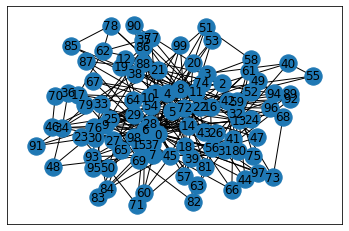

In [4]:
nx.draw_networkx(Gx,pos=pos)

## Better drawing

With community detection and degree distribution

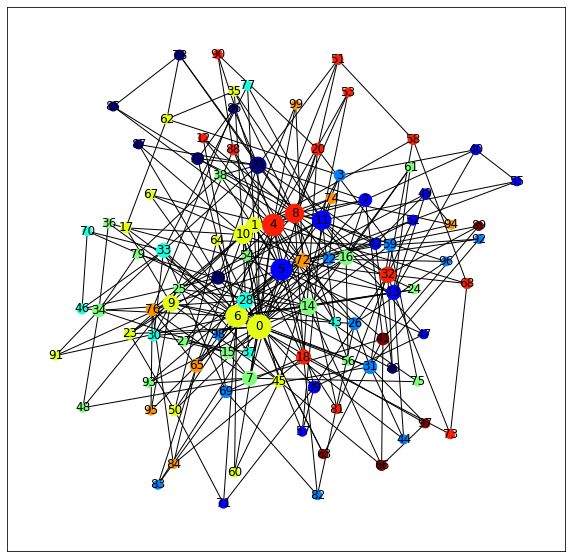

In [5]:
df = np.array(Gx.nodes)
# assign node labels
if len(df.shape) == 1:
    df = np.reshape(df,(len(df),1))
nodelabel = dict(zip(np.linspace(0,len(df[:,0])-1,len(df[:,0]),dtype=int),df[:,0]))
labels = {}
for idx, node in enumerate(Gx.nodes()):
    labels[node] = nodelabel[int(node)]
# detect communities
part = cm.best_partition(Gx)
values = [part.get(node) for node in Gx.nodes()]
# display degree as size
d = nx.degree(Gx)
dsize = [(d[v]+1)*100*0.2 for v in Gx.nodes()]

# plot
plt.figure(figsize=(10,10))
nx.draw_networkx(Gx,pos=pos,labels=labels,with_labels=True,cmap=plt.get_cmap('jet'),node_color=values,
                node_size=dsize)
plt.show()